# A notebook to to get true and predicted CTann and RUI for HRApop atlas datasets


## Goal

See [this GitHub issue](https://github.com/x-atlas-consortia/hra-pop/issues/100)


## Import libraries


In [28]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
from pprint import pprint
from scipy.spatial.distance import cosine

## Set global variables


In [3]:
hra_pop_version = "v0.10.3"

## Load data


In [4]:
df = pd.read_csv("data/validation-v7-ctann-rui.csv")

## Prepare data for visualization and visualize


In [5]:
df

,sex,sample,rui_location,dataset,tool,modality,organ,organId,datasetVsRuiSim,datasetVsTopPredictedRuiSim,ruiVsTopPredictedRuiSim,datasetVsTopPredictedDatasetSim,ruiVsTopPredictedDatasetSim
0,Female,https://api.cellxgene.cziscience.com/dp/v1/col...,http://purl.org/ccf/1.5/9abfed4e-2fde-4d80-a8a...,https://api.cellxgene.cziscience.com/dp/v1/col...,azimuth,sc_transcriptomics,heart,UBERON:0000948,0.911356,0.917636,1.0,0.989803,0.983528
1,Female,https://api.cellxgene.cziscience.com/dp/v1/col...,http://purl.org/ccf/1.5/9abfed4e-2fde-4d80-a8a...,https://api.cellxgene.cziscience.com/dp/v1/col...,celltypist,sc_transcriptomics,heart,UBERON:0000948,0.701952,0.925033,1.0,0.992152,0.981170
2,Female,https://api.cellxgene.cziscience.com/dp/v1/col...,http://purl.org/ccf/1.5/9abfed4e-2fde-4d80-a8a...,https://api.cellxgene.cziscience.com/dp/v1/col...,popv,sc_transcriptomics,heart,UBERON:0000948,0.941554,0.971689,1.0,0.986041,0.988823
3,Female,https://api.cellxgene.cziscience.com/dp/v1/col...,http://purl.org/ccf/1.5/2156f837-2ab2-4305-8e7...,https://api.cellxgene.cziscience.com/dp/v1/col...,azimuth,sc_transcriptomics,heart,UBERON:0000948,0.933921,0.978646,1.0,0.997048,0.983528
4,Female,https://api.cellxgene.cziscience.com/dp/v1/col...,http://purl.org/ccf/1.5/2156f837-2ab2-4305-8e7...,https://api.cellxgene.cziscience.com/dp/v1/col...,celltypist,sc_transcriptomics,heart,UBERON:0000948,0.474365,0.916703,1.0,0.997618,0.981170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,Male,https://entity.api.hubmapconsortium.org/entiti...,http://purl.org/ccf/1.5/e21afc3c-3a7c-4717-90d...,https://entity.api.hubmapconsortium.org/entiti...,popv,sc_transcriptomics,spleen,UBERON:0002106,0.744703,0.744706,1.0,0.993484,0.910879
893,Male,https://entity.api.hubmapconsortium.org/entiti...,http://purl.org/ccf/1.5/b2aca02c-9559-4869-b55...,https://entity.api.hubmapconsortium.org/entiti...,popv,sc_transcriptomics,urinary bladder,UBERON:0001255,1.000000,1.000000,1.0,0.998475,0.998475
894,Male,https://entity.api.hubmapconsortium.org/entiti...,http://purl.org/ccf/1.5/e43280c9-840b-481f-a8a...,https://entity.api.hubmapconsortium.org/entiti...,popv,sc_transcriptomics,urinary bladder,UBERON:0001255,0.998475,0.998475,1.0,0.998733,1.000000
895,Male,https://entity.api.hubmapconsortium.org/entiti...,http://purl.org/ccf/1.5/fb6bb0ea-5ba7-44e2-90a...,https://entity.api.hubmapconsortium.org/entiti...,popv,sc_transcriptomics,urinary bladder,UBERON:0001255,0.913469,0.913469,1.0,0.985884,1.000000


## Compute similarity scores for %AS


### Load atlas enriched dataset graph


In [6]:
ds_graph_path = f"../../../hra-pop/output-data/{
    hra_pop_version}/atlas-enriched-dataset-graph.jsonld"

with open(ds_graph_path) as f:
    graph = json.load(f)
    # pprint(d)

### Define functions


In [19]:
# take 2 extraction sites, get their AS collisions from atlas enriched dataset graph, then compute cosine sim
def compare_as_collision_volumes(iri_1: dict, iri_2: dict):
    """A function that takes two IRIs for extraction sites, gets AS collision volumes, then returns a cosine similarity

    Args:
        iri_1 (str): a dictionary with AS tag and intersection percentage of the extraction site
        iri_2 (str): a dictionary with AS tag and intersection percentage of the extraction site
    """

    pass


def get_as_collision_items(iri: str):
    """A function to get AS collision items for an IRI (extraction site) and return a dictionary with AS UBERON ID and intersection percentage of the extraction site

    Args:
        iri (str): an IRI for an extraction site
    
    Returns:
        a dictionary with the IRI and a nested dictionary with collisions (ID and percentage) 
    """
    
    result = {
	'iri': iri,
        'collisions': {}
    }

    # loop through ds graph
    for donor in graph['@graph']:
        for sample in donor['samples']:
            current = sample['rui_location']
            if current['@id'] == iri:
                for collision_summary in current['all_collisions']:
                    for item in collision_summary['collisions']:
                        result['collisions'][item['as_id']] = item['percentage']

    return result

### Loop through pairs of extraction sites (true and predicted) in validation and compute AS% similarity score


In [34]:
iri_1 = "http://purl.org/ccf/1.5/9abfed4e-2fde-4d80-a8aa-7439a106d895"
iri_2 = "http://purl.org/ccf/1.5/2156f837-2ab2-4305-8e7f-8084249e91cd"


dict1 = get_as_collision_items(iri_1)
dict2 = get_as_collision_items(iri_2)

pprint(dict1)
pprint(dict2)

shared_keys = set(dict1['collisions'].keys()).intersection(dict2['collisions'].keys())
shared_keys

# Example vectors
vec1 = [3, 4, 2]
vec2 = [4, 1, 3]

# Compute cosine similarity
cosine_similarity = 1 - cosine(vec1, vec2)
print(f"Cosine Similarity: {cosine_similarity}")

{'collisions': {'http://purl.obolibrary.org/obo/UBERON_0002084': 0.807},
 'iri': 'http://purl.org/ccf/1.5/9abfed4e-2fde-4d80-a8aa-7439a106d895'}
{'collisions': {'http://purl.obolibrary.org/obo/UBERON_0002084': 0.914},
 'iri': 'http://purl.org/ccf/1.5/2156f837-2ab2-4305-8e7f-8084249e91cd'}
Cosine Similarity: 0.8011927448021526


## Visualize


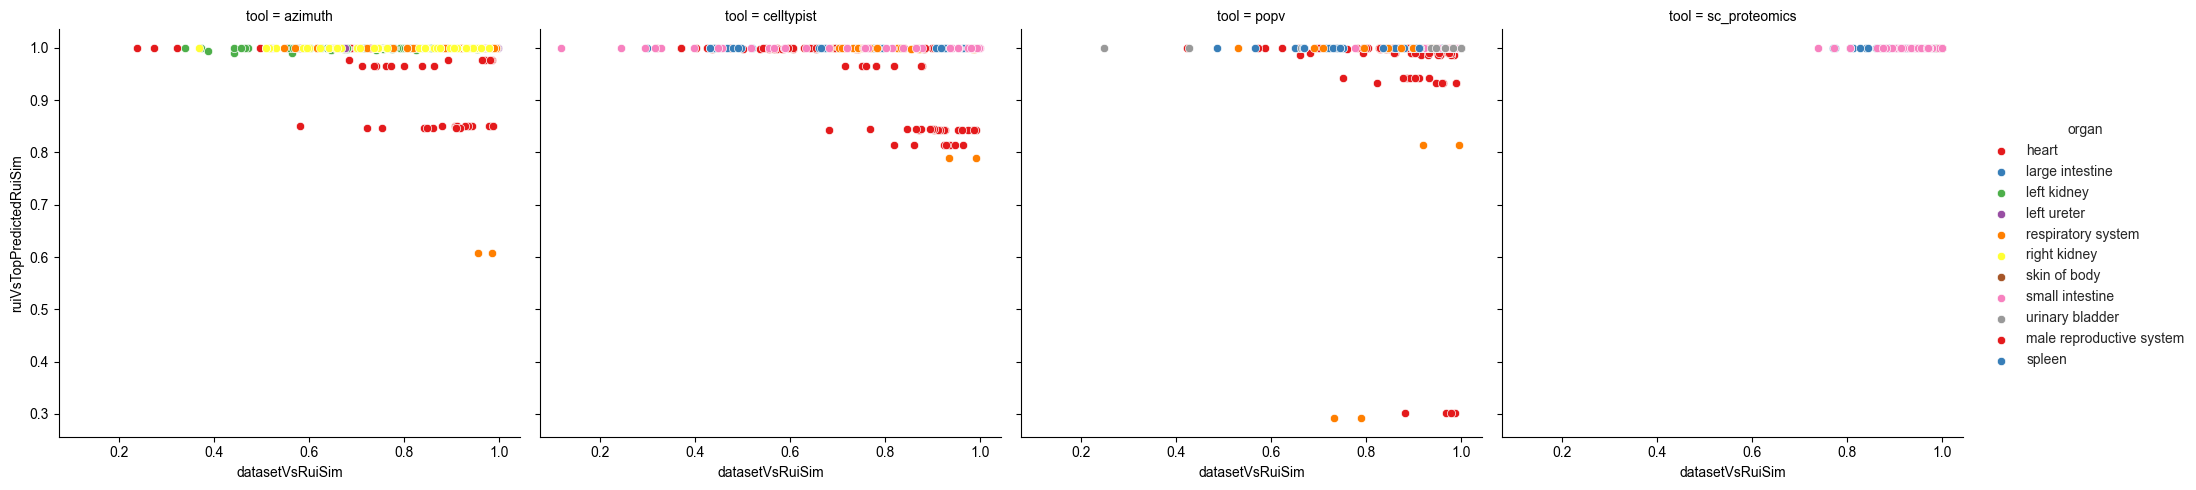

In [9]:
# Create a custom color palette
custom_palette = sns.color_palette("Set1")

# Create FacetGrid
g = sns.FacetGrid(
    df, col="tool", hue="organ", palette=custom_palette, height=5, aspect=1
)

# Set the style of the plot
# Options: "white", "dark", "whitegrid", "darkgrid", "ticks"
sns.set_style("whitegrid")

# Create a scatter plot
g.map(sns.scatterplot, "datasetVsRuiSim", "ruiVsTopPredictedRuiSim")

# Add a legend
g.add_legend()
# Show the plot
plt.show()

## Data dictionary


| Axis | Variable                                                  | Explanation                                                                                                                                 |
| ---- | --------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------- |
| x    | datasetVsRuiSim                                           | CTann (x axis) Cosine sim between TRUE cell summary of input dataset and PREDICTED cell summary of input RUI location (as computed by US 1) |
| y    | ruiVsPredictedRuiSim (with Andi's added compared AS tags) |                                                                                                                                             |
